In [1]:
import random
import pandas as pd
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
from collections import Counter
import re


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC


In [3]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers

In [148]:
from matplotlib import pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['Ham','Spam']

In [59]:
data = pd.read_csv('SMSSpamCollection', sep = '\t', header=None, names=["label", "sms"])
ham_mask=list(data['label']=='ham')
data['label'][ham_mask]=0
data['label'][np.invert(ham_mask)]=1
data

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [60]:
data['label'].mean()*100

13.406317300789663

In [134]:
df_s = data.loc[ data['label']==1]
df_h = data.loc[ data['label']==0]
    
df_s['len'] = df_s['sms'].apply(lambda x: len(x))
spamavg = df_s.len.mean()
print('First 5 spam SMS')
print(df_s.head(5))
print('\nAverage length of spam SMS: ', spamavg)
print('\n\nFirst 5 ham SMS')
df_h['len'] = df_h['sms'].apply(lambda x: len(x))
nonspamavg = df_h.len.mean()
print(df_h.head(5))
print('\nAverage length of ham SMS: ', nonspamavg)

First 5 spam SMS
   label                                                sms  len
2      1  Free entry in 2 a wkly comp to win FA Cup fina...  155
5      1  FreeMsg Hey there darling it's been 3 week's n...  147
8      1  WINNER!! As a valued network customer you have...  157
9      1  Had your mobile 11 months or more? U R entitle...  154
11     1  SIX chances to win CASH! From 100 to 20,000 po...  136

Average length of spam SMS:  138.6706827309237


First 5 ham SMS
  label                                                sms  len
0     0  Go until jurong point, crazy.. Available only ...  111
1     0                      Ok lar... Joking wif u oni...   29
3     0  U dun say so early hor... U c already then say...   49
4     0  Nah I don't think he goes to usf, he lives aro...   61
6     0  Even my brother is not like to speak with me. ...   77

Average length of ham SMS:  71.48248704663213


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10640\3982866886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['len'] = df_s['sms'].apply(lambda x: len(x))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10640\3982866886.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['len'] = df_h['sms'].apply(lambda x: len(x))


In [136]:

def pre_process(sms):
    '''
    Remove punctuation and stop words from the custom sms
    '''
    remove_punct = "".join([word.lower() for word in sms if word not in string.punctuation])
    tokenize = nltk.tokenize.word_tokenize(remove_punct)
    remove_stop_words = [word for word in tokenize if word not in nltk.corpus.stopwords.words('english')]
    remove_phone_number=[re.sub('^\s*(?:\+?(\d{1,3}))?[-. (]*(\d{3})[-. )]*(\d{3})[-. ]*(\d{4})(?: *x(\d+))?\s*$','phonenumber',word) for word in remove_stop_words]
    remove_money=[re.sub('[£]+','moneyamount',word) for word in remove_phone_number]
    remove_number=[re.sub('[0-9]+', 'anumber',word) for word in remove_money]
    remove_https=[re.sub('(http|https)://[^\s]*', 'httpaddr',word) for word in remove_number]
    remove_mail=[re.sub('[^\s]+@[^\s]+', 'emailaddr',word) for word in remove_https]
    return remove_mail


data['processed'] = data['sms'].apply(lambda x: pre_process(x))
data['len'] = data['sms'].apply(lambda x: len(x))
print(data['processed'])

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, anumber, wkly, comp, win, fa, cu...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [anumbernd, time, tried, anumber, contact, u, ...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: processed, Length: 5572, dtype: object


In [138]:
data

,label,sms,processed,len
0,0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",111
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, anumber, wkly, comp, win, fa, cu...",155
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",49
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...",61
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,"[anumbernd, time, tried, anumber, contact, u, ...",160
5568,0,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]",36
5569,0,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestions]",57
5570,0,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, id, interested, b...",125


In [55]:

data_train,data_test,y_train,y_test=train_test_split(data[['processed','len']],list(data['label']),random_state=0)

In [56]:
data_train

,processed,len
872,"[going, goodno, problembut, still, need, littl...",102
831,"[u, secret, admirer, reveal, thinks, u, r, spe...",147
1273,[ok],5
3314,"[huh, hyde, park, mel, ah, opps, got, confused...",113
4929,"[hopeing, ‘, pissed, remember, gone, sisters, ...",96
...,...,...
4931,"[hi, sexychat, girls, waiting, text, text, gre...",124
3264,"[u, gon, na, get, deus, ex]",23
1653,"[ur, chance, win, moneyamountanumber, cash, ev...",122
2607,"[r, u, sam, p, eachother, meet, go, anumber, h...",56


In [121]:
data_train['len'].max()

790

In [221]:
sentences_list=[]
for row in data_train['processed']:
    sentences_list.append(row)

word_list=[]
for sentence in sentences_list:
    if type(sentence) is list:
        for word in sentence:
            word_list.append(word)
    else:
        word_list.append(sentence)

min_occurence=10
vocabs=Counter()
vocabs.update(word_list)
vocabs=vocabs.most_common()
tokens=[k for k,c in vocabs if c >= min_occurence]

print("Number of element in the dictionary: ",len(tokens))
dict={}
for i in range(len(tokens)):
    dict[tokens[i]]=i+1
#list(dict.items())[:10]
dict


Number of element in the dictionary:  721


{'anumber': 1,
 'u': 2,
 'call': 3,
 'im': 4,
 'ur': 5,
 'phonenumber': 6,
 'get': 7,
 'ltgt': 8,
 'dont': 9,
 'moneyamountanumber': 10,
 'go': 11,
 'ok': 12,
 'free': 13,
 'know': 14,
 'good': 15,
 'got': 16,
 'like': 17,
 'ill': 18,
 'time': 19,
 'come': 20,
 'day': 21,
 'love': 22,
 'send': 23,
 'want': 24,
 'text': 25,
 'need': 26,
 'going': 27,
 'ü': 28,
 'one': 29,
 'stop': 30,
 'lor': 31,
 'see': 32,
 'home': 33,
 'txt': 34,
 'back': 35,
 'sorry': 36,
 'r': 37,
 'reply': 38,
 'da': 39,
 'hi': 40,
 'tell': 41,
 'still': 42,
 'today': 43,
 'later': 44,
 'well': 45,
 'new': 46,
 'think': 47,
 'n': 48,
 'cant': 49,
 'take': 50,
 'mobile': 51,
 'phone': 52,
 'please': 53,
 'claim': 54,
 'dear': 55,
 'week': 56,
 'na': 57,
 'night': 58,
 'happy': 59,
 'much': 60,
 'great': 61,
 'hey': 62,
 'hope': 63,
 'oh': 64,
 'way': 65,
 'give': 66,
 'make': 67,
 'prize': 68,
 'pls': 69,
 'say': 70,
 'amp': 71,
 'thats': 72,
 'right': 73,
 'work': 74,
 'ask': 75,
 'wan': 76,
 'tomorrow': 77,
 'mee

In [222]:
def map_bag_of_word(processed_sms):
    result=np.zeros(len(dict))
    for word in processed_sms:
        if word in dict:
            result[dict[word]-1]+=1
    return result

In [16]:
def Ensemble (X,*kwrag):
    temp=0
    answer=np.zeros((np.size(X,0),))
    for model,score in kwrag:
        answer+=np.reshape(model.predict(np.asarray(X))*score,(np.size(X,0),))
        temp+=score
    answer/=temp
    spam_mask=list(answer >= 0.45)

    result=np.zeros(len(answer))
    result[spam_mask]=1
    return result

# Map Bag-of-Word

In [223]:
X_train_o=[]
X_test_o=[]
for item in data_train['processed']:
    X_train_o.append(map_bag_of_word(item))
for item in data_test['processed']:
    X_test_o.append(map_bag_of_word(item))

np.shape(X_train_o) 


(4179, 721)

In [224]:
def concatarray(a1,a2):
    sentence_len=790
    res=[]
    for i in range(len(a1)):
        res.append(np.append(a1[i],a2[i]/sentence_len))
    return res

In [225]:
#X_train = np.concatenate( (X_train_o,np.asanyarray(data_train['len']) ),axis=1)
X_train=concatarray(X_train_o,np.asanyarray(data_train['len']))
np.shape(X_train)

(4179, 722)

In [181]:
X_train[:5]

[array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12911392]),
 array([1.        , 2.        , 1.        , ..., 0.        , 0.        ,
        0.18607595]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00632911]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14303797]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12151899])]

In [226]:
clf=LogisticRegression(C=0.5,max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=1000)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1208
           1       0.99      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



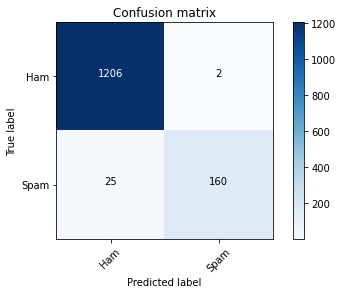

In [227]:
X_test=concatarray(X_test_o,np.asanyarray(data_test['len']))
y_predicted = clf.predict(X_test)

print(classification_report(y_test, y_predicted))
plot_confusion_matrix(confusion_matrix(y_test, y_predicted),classes=class_names) 

In [229]:
accuracy_score(y_test, y_predicted)

0.9806173725771715

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1208
           1       0.99      0.91      0.95       185

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



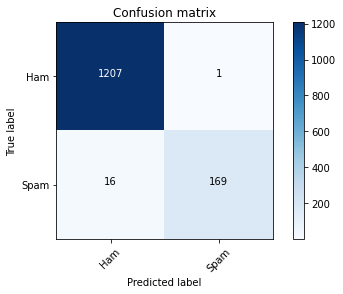

In [228]:
svm=SVC(C=1,kernel='rbf')
svm.fit(X_train,y_train)
y_predicted_svm = svm.predict(X_test)

print(classification_report(y_test, y_predicted_svm))
plot_confusion_matrix(confusion_matrix(y_test, y_predicted_svm),classes=class_names) 

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                46272     
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 48)                3120      
                                                                 
 dropout_31 (Dropout)        (None, 48)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 49        
                                                                 
Total params: 49,441
Trainable params: 49,441
Non-trainable params: 0
_________________________________________________________________
44/44 [==============================] - 0s 1ms/s

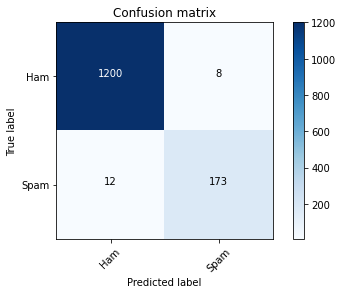

In [230]:
model=keras.Sequential()
model.add(keras.Input(shape=(len(X_train[0]),)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(48, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

model.fit(np.asarray(X_train),np.asarray(y_train),epochs=15,verbose=0)

model.evaluate(np.asarray(X_test),np.asarray(y_test),verbose=0)

y_predicted_NN=model.predict(np.asarray(X_test))
spam_mask_2d=list(y_predicted_NN >= 0.45)
spam_mask=[]
for item in spam_mask_2d:
    for element in item:
        spam_mask.append(bool(element))
y_converted=np.zeros(len(y_predicted_NN))
y_converted[spam_mask]=1
confusion_matrix(y_test,y_converted)

print(classification_report(y_test,y_converted))
plot_confusion_matrix(confusion_matrix(y_test,y_converted),classes=class_names) 